In [1]:
from dataclasses import dataclass

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.dpi"] = 100

In [2]:
@dataclass
class vectorFunction:
    variables: list[str]
    functions: list[callable]

    def __init__(self, variables, functions):
        if len(variables) != len(functions):
            raise ValueError("variables and functions list size don't match")
        
        self.variables = variables
        self.functions = functions
    
    def __call__(self, X):
        return np.array([f(X) for f in self.functions])

def ExplicitRungeKuttaFourthOrder(f: vectorFunction, X: np.array, dt: float):
    k1 = f(X)
    k2 = f(X + k1 * dt / 2)
    k3 = f(X + k2 * dt / 2)
    k4 = f(X + k3 * dt)
    X += dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return X

In [3]:
s = 10
r = 28
b = 8/3
f = lambda x, y, z: s*(y-x)
fs = vectorFunction(['x', 'y', 'z'], [lambda point: s*(point[1]-point[0]), lambda point: point[0]*(r-point[2])-point[1], lambda point: point[0]*point[1]-b*point[2]])
fs(np.array([0.1, 0.1, 0.1]))

array([ 0.        ,  2.69      , -0.25666667])

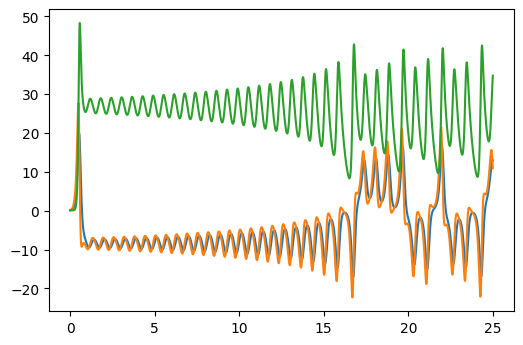

In [10]:
f = lambda point: np.sin(point)

X = np.array([0.1, 0.1, 0.1])

T = 25
dt = 0.01

F = list()
F.append(X)
t = 0
while t < T:
    F.append(ExplicitRungeKuttaFourthOrder(fs, F[-1].copy(), dt))
    t += dt

plt.plot(np.linspace(0, T, int(T/dt) + 1), F)
plt.show()